# Perturbative Corrections to Energy Gaps

Starting from a discretized action which is 
$$ e^{-S_{E,a}} = <q_f|e^{-a V} e^{-a T}|q_i> = <q_f|e^{-a H_0}|q_i>(1 + \mathcal{O}(a^2))$$
we construct a corrected Hamiltonian $H$ using the Baker-Campbell-Hausdorff formula.
Then, using this corrected Hamiltonian
$$H = H_0 + a H_1 + a^2 H_2 + \mathcal{O}(a^3)$$
we compute corrections up to $a^2$ on the energy gaps.

That is we get a linear order in $a$ from 1st order PT in $H_1$, and second order contributions from 2nd order PT in $H_1$ and 1st order PT in $H_2$.
We start by defining $H_1$ and $H_2$

The Baker-Campbell-Hausdorff formula reads
$$ e^{A}e^{B} = e^{A+B + \frac{1}{2}[A,B] + \frac{1}{12}([A,[A,B]] - [B,[A,B]]) + \cdots}$$
where $\cdots \in \mathcal{O}(a^3)$. In our case we have
$$A = -a V = -a \frac{m\omega^2}{2} X^2$$
$$B = -a T = -a \frac{1}{2m} P^2.$$

We thus obtain 
$$ A+B = -a(T+V) = -a H_0$$
$$ \frac{1}{2} [A,B] = \frac{1}{2} (-a)^2  [V, T]$$
$$ \frac{1}{12}[A, [A,B]] = \frac{1}{12} (-a)^3 [V,[V,T]]$$
$$ \frac{1}{12}[B, [A,B]] = \frac{1}{12} (-a)^3  [T, [V, T]]$$

We thus define
$$ H_0 = T + V$$
$$ H_1 = a \frac{1}{2} (-) [V,T]$$
$$ H_2 = a^2\frac{1}{12} ([V, [V,T]] - [T, [V,T]])$$

Assuming
$$ H = H_0 + \lambda V$$
the first order corrections to $E_n$ in $\lambda$ is 
$$ E_n^{(1)} = <n^{(0)}|V|n^{(0)}>$$
s.t.
$$ E_n = E_n^{(0)} + \lambda E_n^{(1)} + \lambda^2 E_n^{(2)} + \mathcal{O}(\lambda^3)$$
and
$$ E_n^{(2)} = \sum\limits_{k\neq n} \frac{|<k^{(0)}|V|n^{(0)}>|^2}{E_n^{(0)} - E_k^{(0)}}$$

We thus have two main parts to compute:

1. Compute corrections from $H_1$ up to 2nd order in $a$, here $\lambda = a$ and we use up to 2nd order PT.
2. Compute corrections from $H_2$ up to 2nd order in $a$, here $\lambda = a^2$ and we use up to 1st order PT.

In [1]:
import sympy
sympy.init_printing()

import sys
sys.path.append("../../CAS/")

from ladder.fockstate import FockState

from ladder.operator import LadderOperator

In [2]:
n, k = sympy.symbols("n k", integer=True, positive=True, real=True)

In [3]:
def C(A, B):
    return A@B + (-1)* B@A

In [4]:
a = LadderOperator(False)
ad = LadderOperator(True)

In [5]:
m, omega, eps = sympy.symbols("m omega epsilon", real=True)

X = sympy.sqrt(1 / m / omega / 2) * (ad + a)
P = sympy.I * sympy.sqrt(m * omega / 2) * (ad + (-1)*a)
T = 1/(2*m) * P@P
V = m*omega**2 / 2 * X@X

In [6]:
T

In [7]:
V

In [8]:
H_1 = -eps/2 * C(V,T) 
H_2 = +(eps**2 / 12)* (C(V, C(V,T)) + (-1)*C(T, C(V,T)))

In [9]:
H_1

## Corrections from $H_1$


Linear corrections

In [10]:
FockState(1,n) @ (H_1 * FockState(1,n))

No linear corrections in $a$.

In [11]:
abs2 = lambda x: x*sympy.conjugate(x)

In [12]:
for k in range(0, 15):
    kp = k - 7
    if(kp != 0):
        print("|<", n+kp, "|V|", n, ">|**2 = ", sympy.simplify(abs2(FockState(1,n+kp) @ (H_1 * FockState(1,n)))))

|< n - 7 |V| n >|**2 =  0
|< n - 6 |V| n >|**2 =  0
|< n - 5 |V| n >|**2 =  0
|< n - 4 |V| n >|**2 =  0
|< n - 3 |V| n >|**2 =  0
|< n - 2 |V| n >|**2 =  epsilon**2*n*omega**4*(n - 1)/16
|< n - 1 |V| n >|**2 =  0
|< n + 1 |V| n >|**2 =  0
|< n + 2 |V| n >|**2 =  epsilon**2*omega**4*(n + 1)*(n + 2)/16
|< n + 3 |V| n >|**2 =  0
|< n + 4 |V| n >|**2 =  0
|< n + 5 |V| n >|**2 =  0
|< n + 6 |V| n >|**2 =  0
|< n + 7 |V| n >|**2 =  0


In [13]:
H_0 = T+V

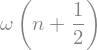

In [14]:
En = sympy.simplify(FockState(1,n) @ (H_0 * FockState(1, n)))
En

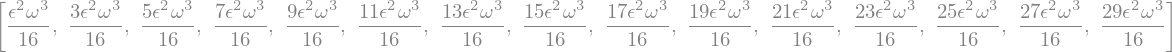

In [29]:
En = lambda n: sympy.simplify(FockState(1,n) @ (H_0 * FockState(1, n)))

energy_corrections_H1 = []
for n in range(15):
    correction = 0
    for k in range(0, 15):
        kp = k - 7
        if(kp != 0 and n + kp >= 0):
            correction += -sympy.simplify(abs2(FockState(1, n+kp) @ (H_1 * FockState(1, n)))) / (En(n) - En(n + kp))
    energy_corrections_H1.append(sympy.simplify(correction))
energy_corrections_H1

Note the $-$ sign because we have $H_0 - \lambda H_1$.

## Corrections from $H_2$

In [30]:
n, k = sympy.symbols("n k", integer=True, positive=True, real=True)

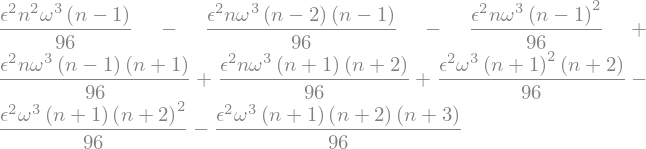

In [31]:
FockState(1,n) @ (H_2 * FockState(1,n))

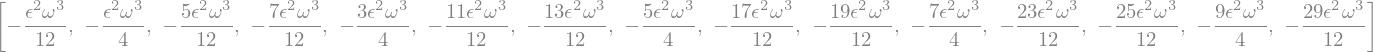

In [32]:
energy_corections_H2 = [FockState(1,n) @ (H_2 * FockState(1,n)) for n in range(15)]
energy_corections_H2

## Total corrections

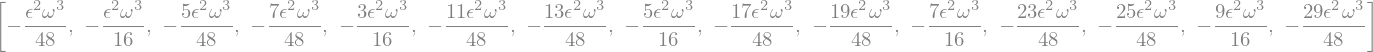

In [33]:
energy_corrections = [a+b for a,b in zip(energy_corrections_H1, energy_corections_H2)]
energy_corrections

In [34]:
1/48

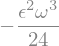

In [35]:
energy_corrections[1] - energy_corrections[0]

In [36]:
-7/24

## Corrected Energies

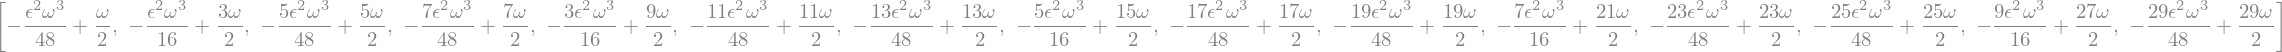

In [37]:
energies = [En(n) + corr for n,corr in enumerate(energy_corrections)]
energies

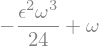

In [38]:
energies[1] - energies[0]

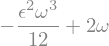

In [39]:
energies[3] - energies[1]

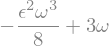

In [40]:
energies[3] - energies[0]

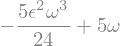

In [41]:
energies[5] - energies[0]

In [42]:
5 / 24